## データの取り込みと確認

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font = "IPAexGothic", style = "white") #グラフのプロパティを設定
plt.rcParams["figure.figsize"] = [10, 5] #グラフの大きさを設定
pd.set_option('display.max_columns', 150) #表示する列数の上限を150に設定
pd.set_option('display.max_rows', 50) #表示する行数の上限を50に設定

In [3]:
# データの取り込み
df_master = pd.read_csv("diabetes_analysis_data.csv")
df = df_master.copy()
df.head()

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,76395,Female,42.0,0,0,never,28.71,6.0,90,0
1,30026,Male,56.0,0,0,current,29.64,5.8,159,0
2,759,Female,27.0,0,0,NaN,27.32,4.8,85,0
3,19671,Female,80.0,0,1,ever,25.33,6.8,280,1
4,17521,Male,45.0,0,0,former,32.54,6.0,130,1


infoメソッドやdescribeメソッドを使って、おかしなデータがないか確認する。

In [3]:
#データの欠損と型の確認(info)
df.info()

# genderとsmoking_historyに欠損あり、smoking_historyは欠損が多いので分析時注意が必要

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21440 entries, 0 to 21439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                21440 non-null  int64  
 1   gender               21434 non-null  object 
 2   age                  21440 non-null  float64
 3   hypertension         21440 non-null  int64  
 4   heart_disease        21440 non-null  int64  
 5   smoking_history      14751 non-null  object 
 6   bmi                  21440 non-null  float64
 7   HbA1c_level          21440 non-null  float64
 8   blood_glucose_level  21440 non-null  int64  
 9   diabetes             21440 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.6+ MB


In [4]:
#データ要約確認(describe)
display(df.describe()) #数値データ
display(df.describe(include="object")) #文字列データ

#ageの最小値が0.08な点と、bmiが最小値0、最大値88.76な点が気になる(後ほど調査)

,index,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000
mean,49795.196082,46.820688,0.114552,0.068424,28.393059,5.868787,152.144636,0.314692
std,28917.870765,22.390530,0.318488,0.252477,7.421419,1.236452,51.930478,0.464404
min,9.000000,0.080000,0.000000,0.000000,0.000000,3.500000,80.000000,0.000000
25%,24738.750000,30.000000,0.000000,0.000000,24.630000,5.000000,126.000000,0.000000
50%,49722.500000,50.000000,0.000000,0.000000,27.320000,6.000000,145.000000,0.000000
75%,74729.250000,65.000000,0.000000,0.000000,31.420000,6.500000,160.000000,1.000000
max,99997.000000,80.000000,1.000000,1.000000,88.760000,9.000000,300.000000,1.000000


,gender,smoking_history
count,21434,14751
unique,2,5
top,Female,never
freq,12277,7696


## 課題1. データの内、どれくらいの人が糖尿病なのか？

diabetesが「1」の人の数と、その割合を算出する 

数： 6747
比率 0.31469216417910445


<Axes: xlabel='diabetes', ylabel='count'>

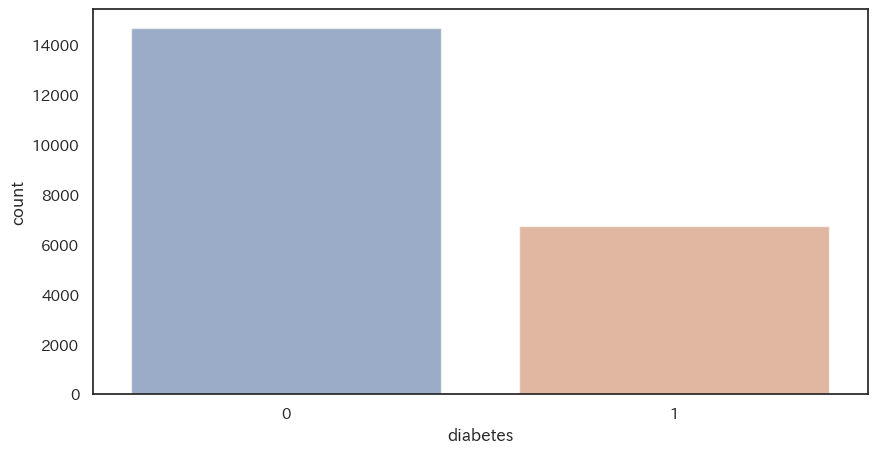

In [19]:
# 糖尿病患者数と割合の算出
print("数：", df["diabetes"].sum()) #数
print("比率", df["diabetes"].mean()) #割合
sns.countplot(x="diabetes", data=df, alpha=0.6) #グラフ化

### 【結論】
糖尿病である人は21440人中6747人であり、割合は31.5%

## 課題2. 糖尿病である人はどのような傾向があるか？

各変数と糖尿病との関係性を確認する  
↓  
ageのような連続変数の場合：糖尿病と非糖尿病でヒストグラムとdescribeを作成し、分布や統計値(平均など)の差を比較  
genderのような2値変数orカテゴリー変数の場合：カテゴリー別に棒グラフと糖尿病率を作成し、糖尿病率の差を比較

,diabetes
gender,
Female,0.289321
Male,0.348913


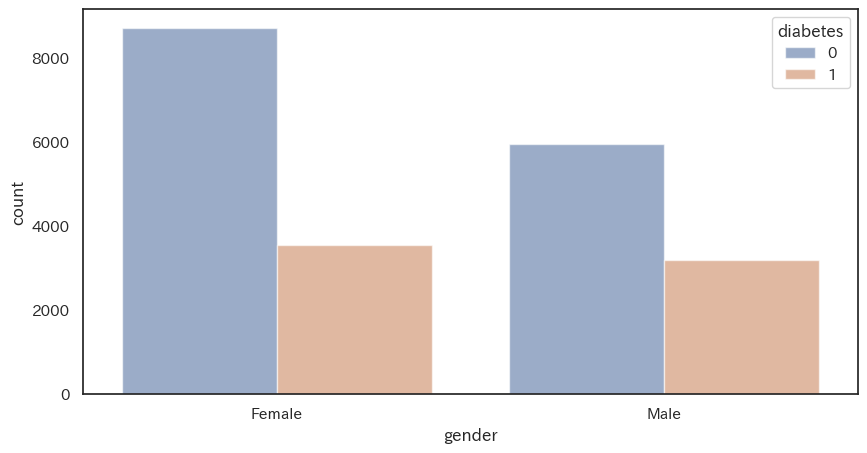

In [18]:
#gender
target = "gender"
sns.countplot(x=target, data=df, hue="diabetes", alpha=0.6)
df[["diabetes", target]].groupby(target).mean()

# 男性の方が糖尿病の確率がやや高い

In [4]:
#age 0.08歳の調査
df.query('age <= 3')

#3歳以下のデータも多くあり、特におかしなところもなさそうなので、いったん正しいデータと捉えてよさそう。

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
56,67946,Male,0.72,0,0,NaN,16.00,3.5,140,0
58,4544,Female,1.80,0,0,NaN,13.85,6.1,200,0
70,23668,Female,0.72,0,0,NaN,14.37,4.8,80,0
207,89986,Female,0.80,0,0,NaN,16.70,6.5,145,0
211,72095,Male,3.00,0,0,NaN,17.90,6.6,90,0
...,...,...,...,...,...,...,...,...,...,...
21337,91786,Female,1.72,0,0,NaN,15.77,6.2,126,0
21351,42328,Female,0.48,0,0,NaN,18.86,6.2,200,0
21357,35769,Male,3.00,0,0,NaN,18.11,6.1,160,0
21389,21046,Female,1.40,0,0,NaN,15.60,5.8,130,0


diabetes      age                                                    
              count       mean        std   min   25%   50%   75%   max
0        0  14693.0  40.326928  22.378458  0.08  22.0  40.0  57.0  80.0
1        1   6747.0  60.962205  14.516536  3.00  52.0  62.0  72.0  80.0

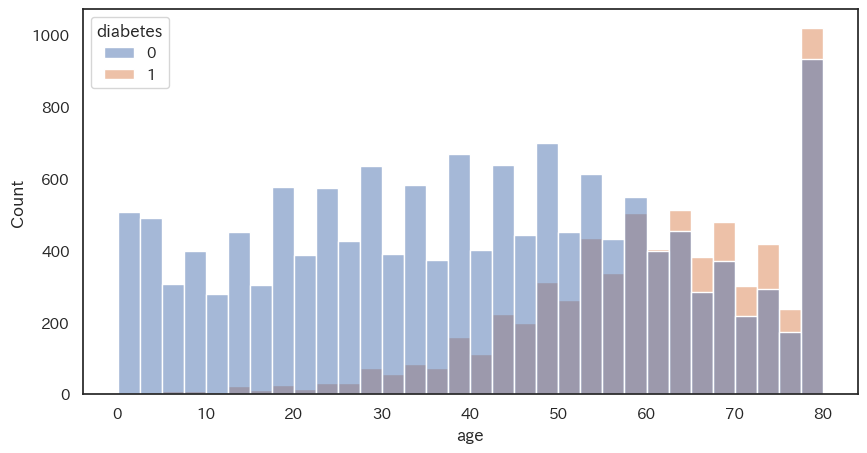

In [15]:
#age
target="age"
sns.histplot(x=target, hue="diabetes", data=df)
df.groupby("diabetes", as_index=False).describe()[["diabetes", target]]

# 高齢な方ほど糖尿病の確率が顕著に高くなっている。ただ3歳でも糖尿病の人もいる。

,diabetes
hypertension,
0,0.270333
1,0.657573


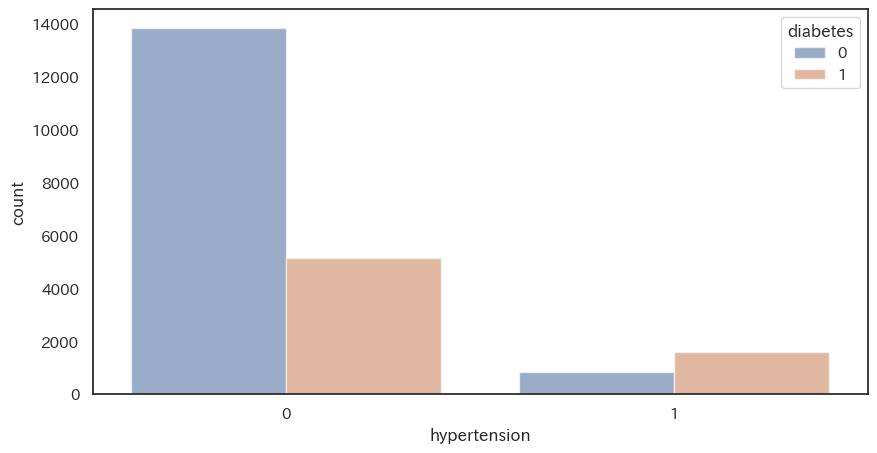

In [5]:
#hypertension
target = "hypertension"
sns.countplot(x=target, data=df, hue="diabetes", alpha=0.6)
df[["diabetes", target]].groupby(target).mean()

# 高血圧の人は糖尿病である確率が顕著に高い

,diabetes
heart_disease,
0,0.287138
1,0.689843


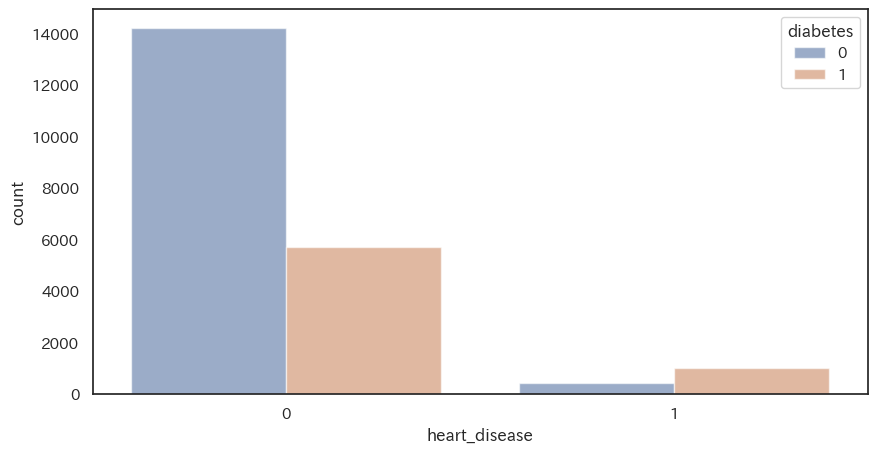

In [6]:
#heart_disease
target = "heart_disease"
sns.countplot(x=target, data=df, hue="diabetes", alpha=0.6)
df[["diabetes", target]].groupby(target).mean()

# 高血圧と同様、心臓病も糖尿病と合併しやすい

,diabetes
hypertension*heart_disease,
高血圧0心臓病0,0.245778
高血圧0心臓病1,0.668784
高血圧1心臓病0,0.640842
高血圧1心臓病1,0.753425


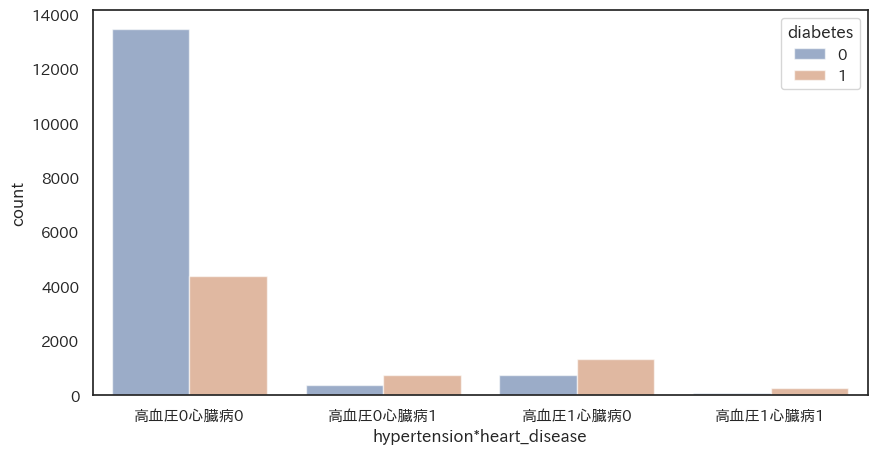

In [11]:
# hypertension * heart_disease
df["hypertension*heart_disease"] = "高血圧" + df["hypertension"].astype("str") + "心臓病" + df["heart_disease"].astype("str")
target = "hypertension*heart_disease"
sns.countplot(x=target, data=df, hue="diabetes", alpha=0.6)
df[["diabetes", target]].groupby(target).mean()

# 高血圧と心臓病どちらか一つでも持っていると、糖尿病の確率が跳ね上がることが分かる。

In [12]:
#smoking_history 欠損調査
df.query('smoking_history != smoking_history')

#smoking_history以外に気になるところはない

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension*heart_disease
2,759,Female,27.0,0,0,NaN,27.32,4.8,85,0,高血圧0心臓病0
11,39131,Female,7.0,0,0,NaN,18.63,6.6,90,0,高血圧0心臓病0
14,59450,Female,60.0,0,0,NaN,39.52,7.0,240,1,高血圧0心臓病0
20,9143,Male,5.0,0,0,NaN,16.34,6.0,140,0,高血圧0心臓病0
27,92444,Female,32.0,0,0,NaN,27.32,4.8,80,0,高血圧0心臓病0
...,...,...,...,...,...,...,...,...,...,...,...
21429,91934,Female,13.0,0,0,NaN,27.32,6.1,140,0,高血圧0心臓病0
21430,43944,Female,66.0,0,0,NaN,27.32,5.7,90,0,高血圧0心臓病0
21432,38049,Female,7.0,0,0,NaN,16.94,6.5,85,0,高血圧0心臓病0
21434,68540,Female,55.0,0,0,NaN,27.32,6.0,90,0,高血圧0心臓病0


,diabetes
smoking_history,
NULL,0.173270
current,0.358742
ever,0.378186
former,0.509434
never,0.344075
not current,0.368598


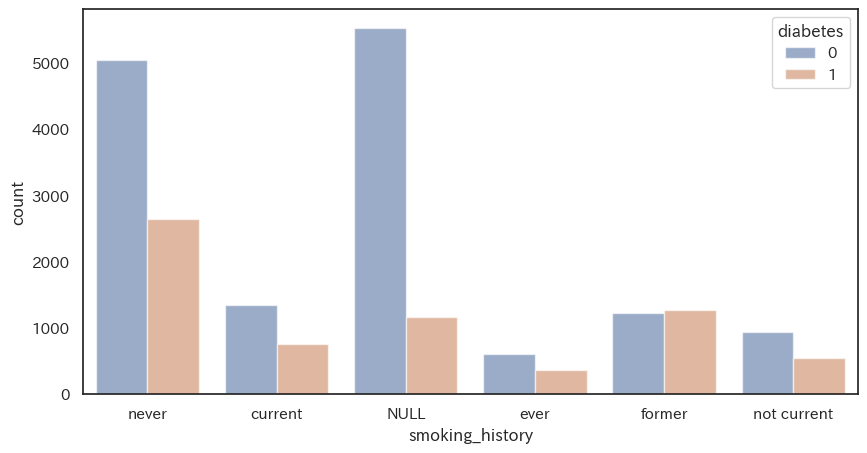

In [13]:
#smoking_history
#former(元喫煙者), current(現喫煙者), never(非喫煙者), ever(毎日喫煙者), not current(元喫煙者), NULL(不明)
df["smoking_history"] = df["smoking_history"].fillna("NULL")
target = "smoking_history"
sns.countplot(x=target, data=df, hue="diabetes", alpha=0.6)
df[["diabetes", target]].groupby(target).mean()

# 欠損だけ糖尿病率が低いため、何らかの意味がある欠損である可能性が高い
# neverの糖尿病率があまり低くないのは意外 → 喫煙と糖尿病は意外とそこまで関係ない？？
# 現喫煙者よりも元喫煙者の方が糖尿病率が高い → 糖尿病診断を受けて喫煙をやめた人がいる or 元喫煙者には高齢な人が多い、などの仮説が立てられそう

In [14]:
# smoking_history別の平均年齢
df[["age", "smoking_history"]].groupby("smoking_history").mean()

# やはりformerの平均年齢が一番高いため、年齢と擬似相関している可能性もある
# NULLは平均年齢が若いため、未成年などは喫煙歴を聴取していないため欠損になっているパターンもありそう

,age
smoking_history,
NULL,37.415123
current,47.368423
ever,52.165138
former,60.281815
never,48.848056
not current,51.798410


In [18]:
#bmi 最小値0の調査
print(df.query('bmi != 0')["bmi"].min()) #bmi0を除いた最小bmi
print(df.query('bmi == 0')["age"].mean()) #bmi0の人の平均年齢
df.query('bmi == 0')

#bmi0を除いた最小値は10.86であり、これが正しい値だと考えられそう
#他の値におかしなところはなく、何らかの理由でbmiが測定できなかった人が「0」になっている可能性が高そう
#原因不明なため、分析時はbmi0の人を除いて分析するのが良い

10.86
48.72529411764705


,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension*heart_disease
26,28080,Female,44.0,0,0,never,0.0,6.1,140,0,高血圧0心臓病0
106,22113,Male,76.0,1,0,NULL,0.0,6.1,85,0,高血圧1心臓病0
368,53001,Male,62.0,0,0,NULL,0.0,8.2,145,1,高血圧0心臓病0
586,97929,Female,57.0,0,0,never,0.0,5.8,160,0,高血圧0心臓病0
710,69849,Male,76.0,0,0,not current,0.0,5.8,260,1,高血圧0心臓病0
...,...,...,...,...,...,...,...,...,...,...,...
20391,77571,Male,27.0,0,0,current,0.0,5.8,130,0,高血圧0心臓病0
20625,50193,Male,80.0,0,0,ever,0.0,4.0,85,0,高血圧0心臓病0
20671,37908,Female,34.0,0,0,never,0.0,5.0,126,0,高血圧0心臓病0
20900,89856,Female,69.0,0,0,NULL,0.0,5.7,126,0,高血圧0心臓病0


In [20]:
#bmi 最大値の調査
df.sort_values("bmi", ascending=False).head(10)

# データにおかしな点はなく、海外ではbmiが高い人も存在するのかもしれないので、高値のbmiは正しい数字だと考えておく

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension*heart_disease
8588,96066,Male,80.0,0,0,never,88.76,6.2,140,0,高血圧0心臓病0
10668,4551,Female,45.0,0,0,never,88.72,7.0,300,1,高血圧0心臓病0
8659,90043,Female,34.0,0,0,NULL,87.70,6.0,126,0,高血圧0心臓病0
12209,22454,Male,19.0,0,0,NULL,87.51,3.5,85,0,高血圧0心臓病0
7384,24186,Male,49.0,0,0,former,83.74,6.8,155,1,高血圧0心臓病0
18208,58318,Female,36.0,0,0,never,79.46,6.2,220,1,高血圧0心臓病0
18479,20355,Female,55.0,0,0,former,73.77,6.6,160,0,高血圧0心臓病0
9710,28645,Female,42.0,0,0,never,72.89,6.8,280,1,高血圧0心臓病0
11893,82244,Female,52.0,0,0,never,72.21,6.6,220,1,高血圧0心臓病0
12735,63048,Female,39.0,0,0,never,70.96,6.6,85,0,高血圧0心臓病0


diabetes      bmi                                                        
              count       mean       std    min    25%    50%    75%    max
0        0  14641.0  26.859171  6.482021  10.86  23.13  27.32  28.88  88.76
1        1   6731.0  32.016351  7.593397  11.91  27.32  29.97  35.94  88.72

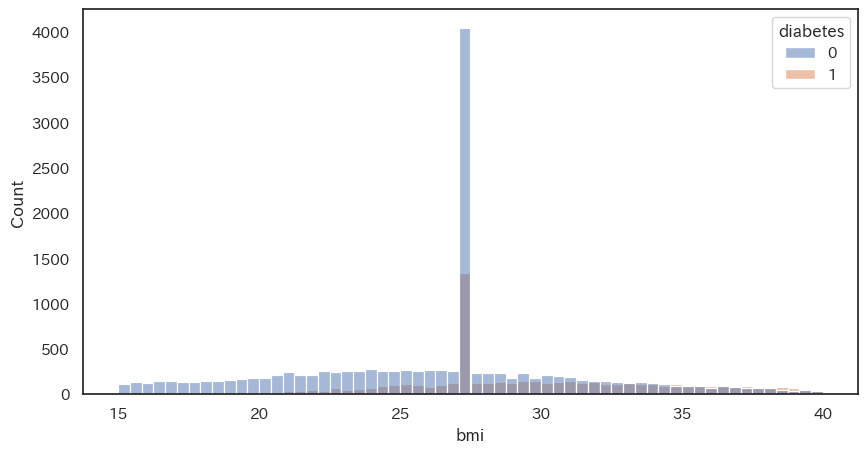

In [26]:
#bmi
df_except_bmi0 = df.query('bmi != 0')
df_graph = df.query('bmi>15 and bmi<40')
target="bmi"
sns.histplot(x=target, hue="diabetes", data=df_graph)
df_except_bmi0.groupby("diabetes", as_index=False).describe()[["diabetes", target]]

# bmi27あたりに異常に固まっているのが気になるが、分析結果には影響が少なそうなため、無視して考える
# 基本的にbmiが高くなるほど糖尿病率が上がっていく

diabetes HbA1c_level                                             
                 count      mean       std  min  25%  50%  75%  max
0        0     14693.0  5.381331  0.973296  3.5  4.5  5.7  6.1  6.6
1        1      6747.0  6.930325  1.072820  5.7  6.1  6.6  7.5  9.0

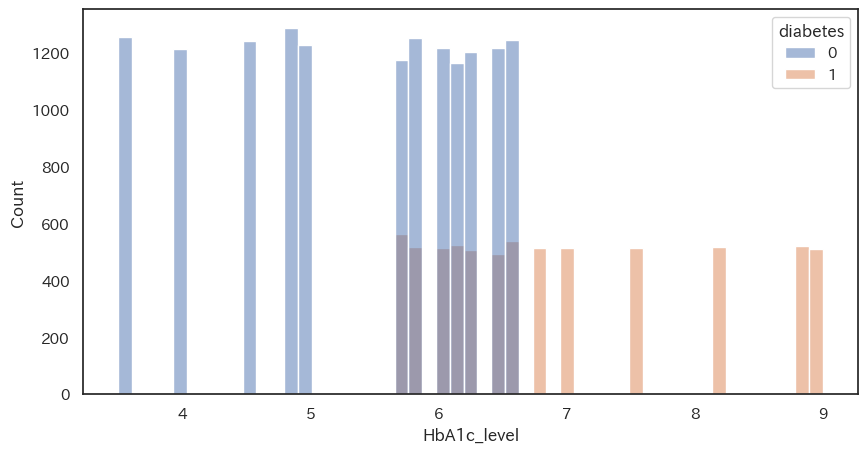

In [27]:
#HbA1c_level
target="HbA1c_level"
sns.histplot(x=target, hue="diabetes", data=df)
df.groupby("diabetes", as_index=False).describe()[["diabetes", target]]

# HbA1cは糖尿病診断基準の一つ(6.5以上がカットオフ)
# 5.5以下は全員非糖尿病、5.5~7がグレーゾーン、7以上は全員糖尿病になっている
# HbA1cは予防というより確定診断という立ち位置

diabetes blood_glucose_level                                              \
                         count        mean        std    min    25%    50%   
0        0             14693.0  132.831757  34.069874   80.0  100.0  140.0   
1        1              6747.0  194.202460  58.829767  126.0  145.0  160.0   

                 
     75%    max  
0  158.0  200.0  
1  240.0  300.0

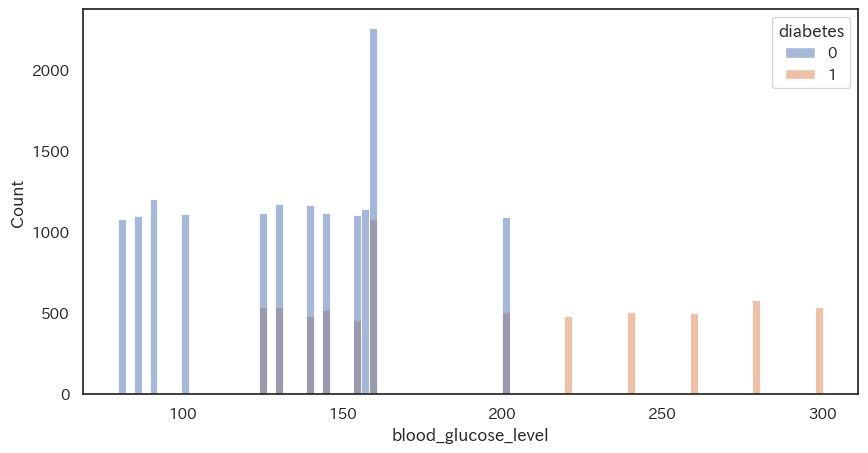

In [28]:
#blood_glucose_level
target="blood_glucose_level"
sns.histplot(x=target, hue="diabetes", data=df)
df.groupby("diabetes", as_index=False).describe()[["diabetes", target]]

# 血糖値も糖尿病診断基準の一つ(カットオフは空腹時血糖126以上、随時血糖値200以上。今回のデータは空腹時なのか随時なのか不明)
# 126以下は全員糖尿病ではなく、200より大きい人は全員糖尿病、その間がグレーゾーン
# HbA1cと同様に予防というより確定診断という立ち位置

### 【結論】
糖尿病の人は以下の傾向がみられた
- 年齢が高い(65歳以上になると半分以上が糖尿病)
- 既往に高血圧か心臓病のいずれかを持っている
- bmiが高い(bmi35以上になると半分以上が糖尿病)
- HbA1cとblood_glucose_levelは強く影響するので、確定診断に使える(予防という観点からは使いづらい)

## 課題3. 糖尿病を予防するにはどのようなアクションが有効そうか？

1. 年齢が65歳以上の人への早期アクション 
   定期的な健康診断や運動指導、栄養指導の機会を増やす、地元コミュニティの活性化など  
2. 既往に高血圧や心臓病を持つ人へのアクション  
   糖尿病を合併するリスクを医師や本人に周知し、糖尿病にも気をつけてもらう  
3. bmiが高い人へのアクション  
   基本的には全員22を目指すよう指導し、bmiが35以上の人は特に食事、栄養指導などのサポートを行う  
  
ex) 機械学習を使って糖尿病になる確率を予測し、確率が高い人に重点的に上記アクションを行うといったアプローチもある(興味がある方は機械学習実践クラスで)  

## 分析の結論

### 課題1. データの内、どれくらいの人が糖尿病なのか？
糖尿病である人は21440人中6747人であり、割合は31.5%

### 課題2. 糖尿病である人はどのような傾向があるか？

糖尿病の人は以下の傾向がみられた
- 年齢が高い(65歳以上になると半分以上が糖尿病)
- 既往に高血圧か心臓病のいずれかを持っている
- bmiが高い(bmi35以上になると半分以上が糖尿病)
- HbA1cとblood_glucose_levelは強く影響するので、確定診断に使える(予防という観点からは使いづらい)

### 課題3. 糖尿病を予防するにはどのようなアクションが有効そうか？

1. 年齢が65歳以上の人への早期アクション 
   定期的な健康診断や運動指導、栄養指導の機会を増やす、地元コミュニティの活性化など  
2. 既往に高血圧や心臓病を持つ人へのアクション  
   糖尿病を合併するリスクを医師や本人に周知し、糖尿病にも気をつけてもらう  
3. bmiが高い人へのアクション  
   基本的には全員22を目指すよう指導し、bmiが35以上の人は特に食事、栄養指導などのサポートを行う  
  
ex) 機械学習を使って糖尿病になる確率を予測し、確率が高い人に重点的に上記アクションを行うといったアプローチもある(興味がある方は機械学習実践クラスで)  